Лабораторная работа №2

Выполнил: Бонокин Данил, М8О-310Б-22

1. Импортмруем библиотеки и загружаем датасеты

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from os.path import abspath, dirname


print(np.__version__)
DATA_PATH = f'{dirname(abspath(__vsc_ipynb_file__))}/'
df = pd.read_csv(DATA_PATH + 'train.csv')
df_test = pd.read_csv(DATA_PATH + 'test.csv')

df.head()

1.26.4


,ApplicationDate,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,...,EmploymentStatus,EducationLevel,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2010-06-26,27.0,66829.0,549.0,17290.0,60.0,Divorced,1.0,Rent,1095.0,...,Employed,Associate,4.0,35067.0,0.257790,0.251465,508.970230,0.288013,0.0,66.176500
1,1996-09-23,55.0,172147.0,850.0,16110.0,36.0,Widowed,1.0,Mortgage,211.0,...,Employed,High School,33.0,27001.0,0.086110,0.093173,514.675859,0.050585,1.0,28.495737
2,2015-01-19,51.0,300000.0,850.0,38436.0,36.0,Married,0.0,Mortgage,546.0,...,Employed,Bachelor,28.0,278382.0,0.108436,0.115443,1268.276385,0.072571,1.0,34.488104
3,1981-05-12,25.0,34683.0,847.0,19186.0,48.0,Married,0.0,Other,153.0,...,Employed,High School,0.0,9224.0,0.100686,0.112822,498.505187,0.225415,1.0,36.910753
4,1995-05-07,55.0,300000.0,850.0,30437.0,48.0,Single,2.0,Rent,562.0,...,Employed,Bachelor,31.0,4502.0,0.110437,0.089037,756.035156,0.052721,1.0,31.347091


2. Приведем типы object

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11017 entries, 0 to 11016
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             10487 non-null  object 
 1   Age                         10487 non-null  float64
 2   AnnualIncome                10487 non-null  float64
 3   CreditScore                 9986 non-null   float64
 4   LoanAmount                  9986 non-null   float64
 5   LoanDuration                10487 non-null  float64
 6   MaritalStatus               10487 non-null  object 
 7   NumberOfDependents          10487 non-null  float64
 8   HomeOwnershipStatus         10487 non-null  object 
 9   MonthlyDebtPayments         9986 non-null   float64
 10  CreditCardUtilizationRate   10487 non-null  float64
 11  NumberOfOpenCreditLines     10487 non-null  float64
 12  NumberOfCreditInquiries     10487 non-null  float64
 13  DebtToIncomeRatio           104

Приведем колонку ApplicationDate к datetime, затем создадим 3 колонки ApplicationYear, ApplicationMonth, ApplicationDay и запишем туда значения из ApplicationDate. 

In [19]:
df['ApplicationDate'] = pd.to_datetime(df['ApplicationDate'], format = '%Y-%m-%d')
df_test['ApplicationDate'] = pd.to_datetime(df_test['ApplicationDate'], format = '%Y-%m-%d')
 
df['ApplicationYear'] = df['ApplicationDate'].dt.year
df['ApplicationMonth'] = df['ApplicationDate'].dt.month
df['ApplicationDay'] = df['ApplicationDate'].dt.day

df_test['ApplicationYear'] = df_test['ApplicationDate'].dt.year
df_test['ApplicationMonth'] = df_test['ApplicationDate'].dt.month
df_test['ApplicationDay'] = df_test['ApplicationDate'].dt.day

df = df.drop(columns = ['ApplicationDate'])
df_test = df_test.drop(columns = ['ApplicationDate'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11017 entries, 0 to 11016
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         10487 non-null  float64
 1   AnnualIncome                10487 non-null  float64
 2   CreditScore                 9986 non-null   float64
 3   LoanAmount                  9986 non-null   float64
 4   LoanDuration                10487 non-null  float64
 5   MaritalStatus               10487 non-null  object 
 6   NumberOfDependents          10487 non-null  float64
 7   HomeOwnershipStatus         10487 non-null  object 
 8   MonthlyDebtPayments         9986 non-null   float64
 9   CreditCardUtilizationRate   10487 non-null  float64
 10  NumberOfOpenCreditLines     10487 non-null  float64
 11  NumberOfCreditInquiries     10487 non-null  float64
 12  DebtToIncomeRatio           10487 non-null  float64
 13  BankruptcyHistory           998

Теперь применим One-Hot Encoding для MartialStatus, HomeOwnershipStatus, LoanPurpose, EmploymentStatus, EducationLevel

In [20]:
columns = ['MaritalStatus', 'HomeOwnershipStatus', 'LoanPurpose', 'EmploymentStatus', 'EducationLevel']

df = pd.get_dummies(df, columns = columns, drop_first = True)
df_test = pd.get_dummies(df_test, columns = columns, drop_first = True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11017 entries, 0 to 11016
Data columns (total 49 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             10487 non-null  float64
 1   AnnualIncome                    10487 non-null  float64
 2   CreditScore                     9986 non-null   float64
 3   LoanAmount                      9986 non-null   float64
 4   LoanDuration                    10487 non-null  float64
 5   NumberOfDependents              10487 non-null  float64
 6   MonthlyDebtPayments             9986 non-null   float64
 7   CreditCardUtilizationRate       10487 non-null  float64
 8   NumberOfOpenCreditLines         10487 non-null  float64
 9   NumberOfCreditInquiries         10487 non-null  float64
 10  DebtToIncomeRatio               10487 non-null  float64
 11  BankruptcyHistory               9986 non-null   float64
 12  PreviousLoanDefaults            

3. Удаляем все пропуски

мы можем удалить все строки с пропусками, так как их количество это небольшая доля от общего числа записей в дата-фрейме

In [21]:
df = df.dropna()

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9986 entries, 0 to 11014
Data columns (total 49 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             9986 non-null   float64
 1   AnnualIncome                    9986 non-null   float64
 2   CreditScore                     9986 non-null   float64
 3   LoanAmount                      9986 non-null   float64
 4   LoanDuration                    9986 non-null   float64
 5   NumberOfDependents              9986 non-null   float64
 6   MonthlyDebtPayments             9986 non-null   float64
 7   CreditCardUtilizationRate       9986 non-null   float64
 8   NumberOfOpenCreditLines         9986 non-null   float64
 9   NumberOfCreditInquiries         9986 non-null   float64
 10  DebtToIncomeRatio               9986 non-null   float64
 11  BankruptcyHistory               9986 non-null   float64
 12  PreviousLoanDefaults            9986 n

4. Корреляция и тепловая карта (Heatmap)

визуально отобразим корреляции между признаками

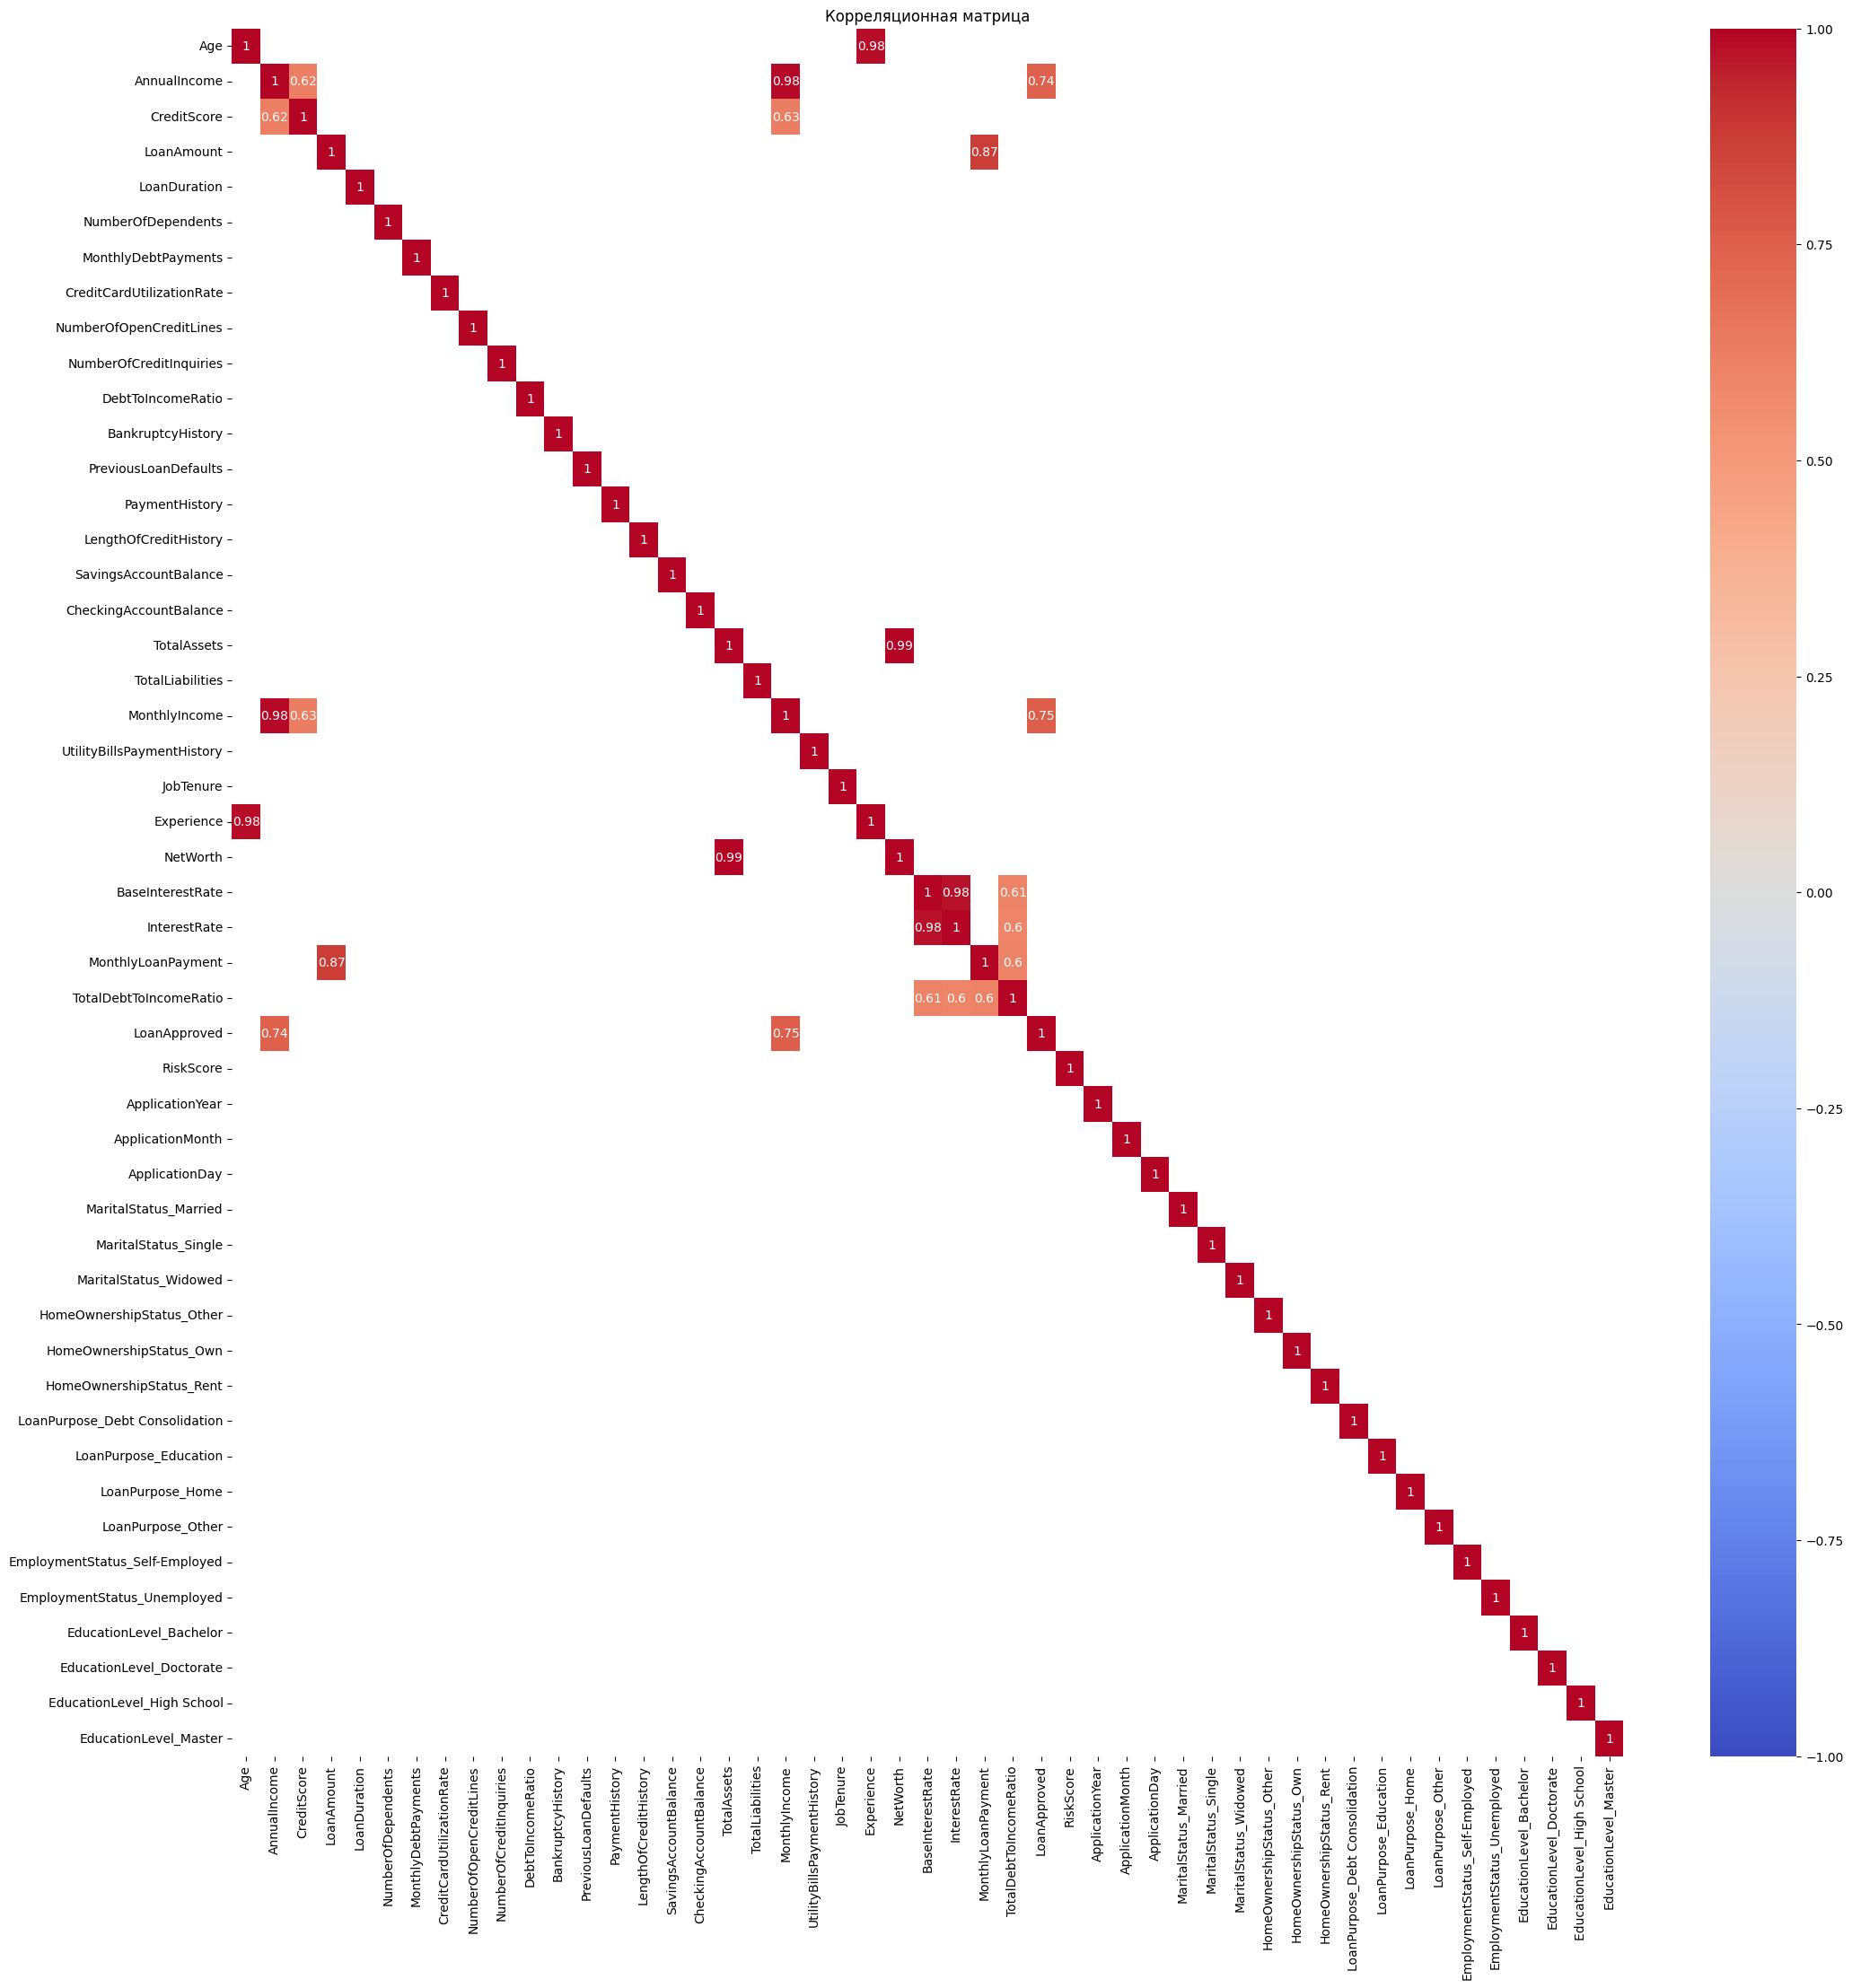

In [22]:
corr_matrix = df.corr()

plt.figure(figsize = (25, 25))
sns.heatmap(corr_matrix[corr_matrix > 0.6], annot = True, cmap = 'coolwarm', vmin = -1, vmax = 1)
plt.title('Корреляционная матрица')
plt.show()

Рассмотрим признаки с сильной корреляцией (выше 0.7)

In [23]:
high_corr = corr_matrix[(corr_matrix >= 0.7) & (corr_matrix != 1.)].stack()
print(high_corr)

Age                 Experience            0.982989
AnnualIncome        MonthlyIncome         0.984910
                    LoanApproved          0.742706
LoanAmount          MonthlyLoanPayment    0.872539
TotalAssets         NetWorth              0.994042
MonthlyIncome       AnnualIncome          0.984910
                    LoanApproved          0.754939
Experience          Age                   0.982989
NetWorth            TotalAssets           0.994042
BaseInterestRate    InterestRate          0.975359
InterestRate        BaseInterestRate      0.975359
MonthlyLoanPayment  LoanAmount            0.872539
LoanApproved        AnnualIncome          0.742706
                    MonthlyIncome         0.754939
dtype: float64


Удалим признаки так, чтобы исключить линейные зависимости

In [24]:

colums_ = ['Experience', 'MonthlyIncome', 'AnnualIncome', 'TotalAssets', 'BaseInterestRate', 'MonthlyLoanPayment']
df = df.drop(columns = colums_)
df_test = df_test.drop(columns = colums_)

5. Нормализуем признаки

In [25]:

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

scaler_standard = StandardScaler()
scaler_min_max = MinMaxScaler()

df.info()

print(df.columns)

<class 'pandas.core.frame.DataFrame'>
Index: 9986 entries, 0 to 11014
Data columns (total 43 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             9986 non-null   float64
 1   CreditScore                     9986 non-null   float64
 2   LoanAmount                      9986 non-null   float64
 3   LoanDuration                    9986 non-null   float64
 4   NumberOfDependents              9986 non-null   float64
 5   MonthlyDebtPayments             9986 non-null   float64
 6   CreditCardUtilizationRate       9986 non-null   float64
 7   NumberOfOpenCreditLines         9986 non-null   float64
 8   NumberOfCreditInquiries         9986 non-null   float64
 9   DebtToIncomeRatio               9986 non-null   float64
 10  BankruptcyHistory               9986 non-null   float64
 11  PreviousLoanDefaults            9986 non-null   float64
 12  PaymentHistory                  9986 n

постоим графики для нормализации

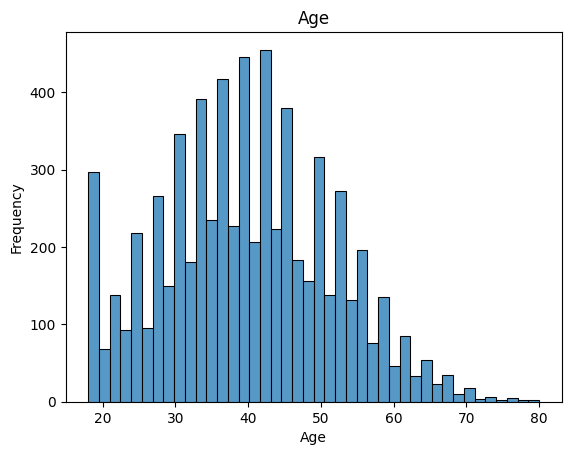

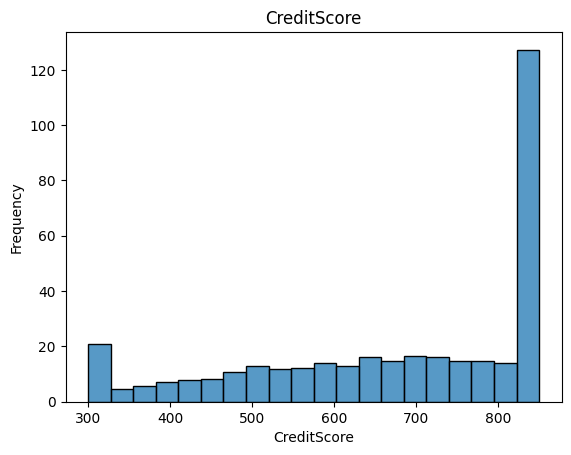

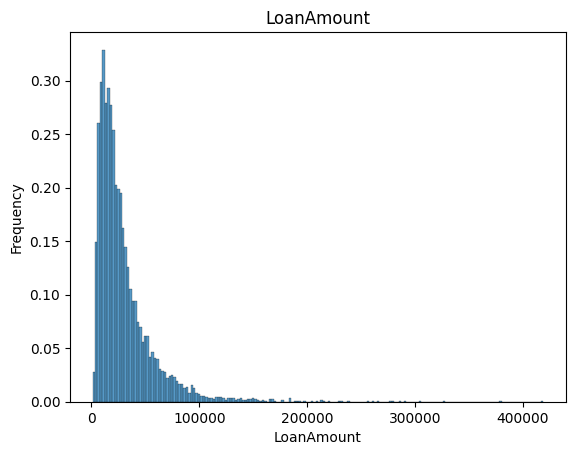

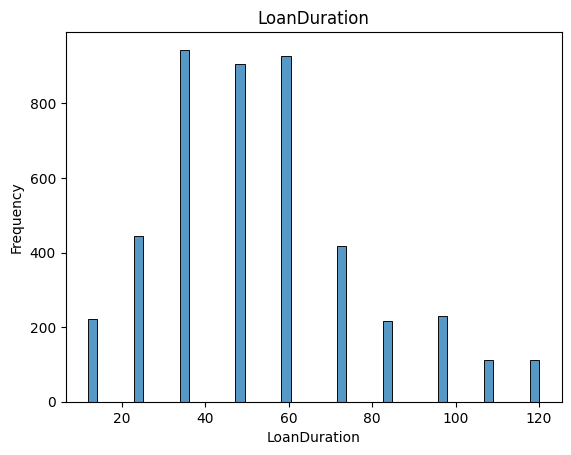

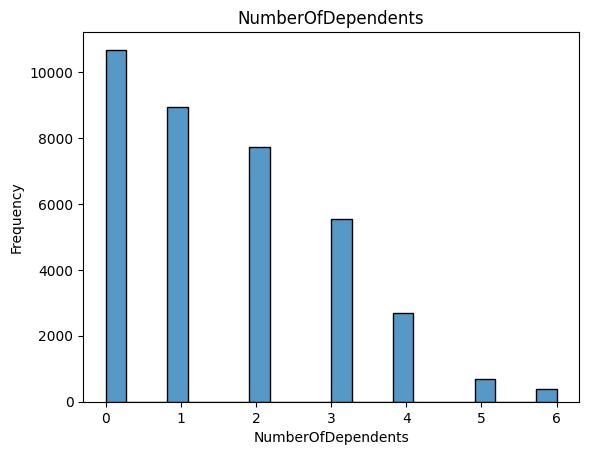

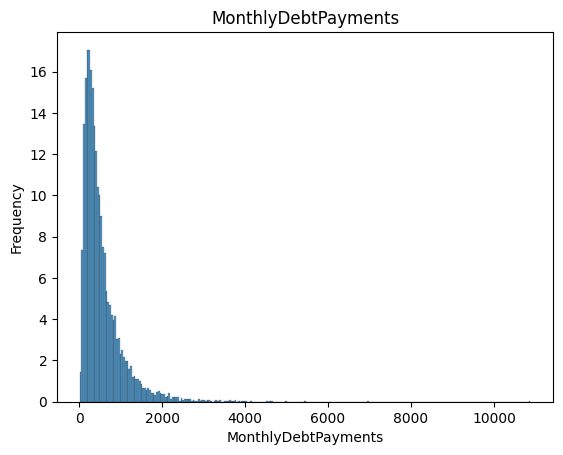

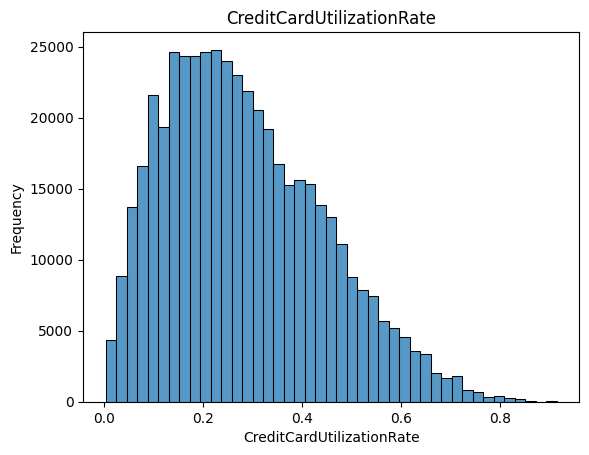

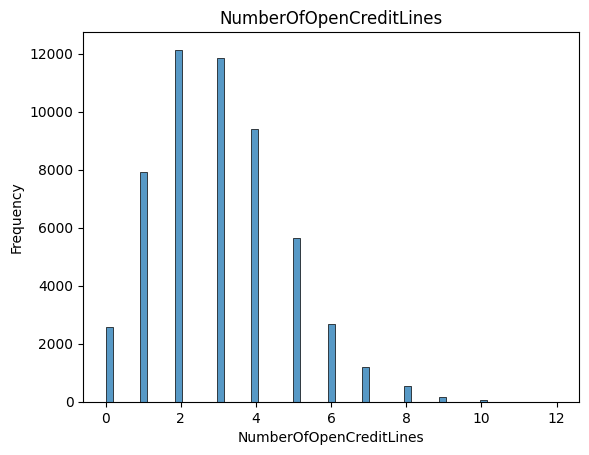

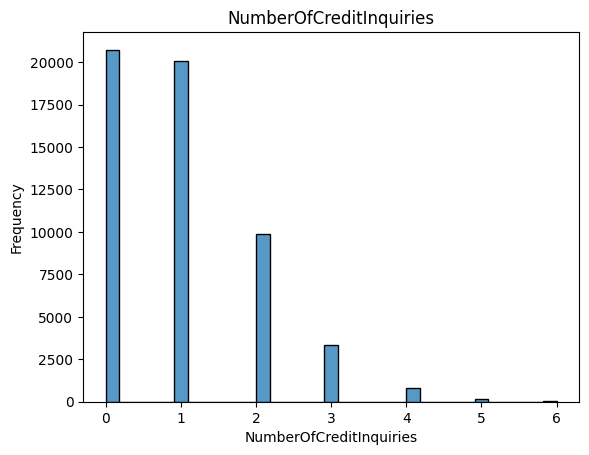

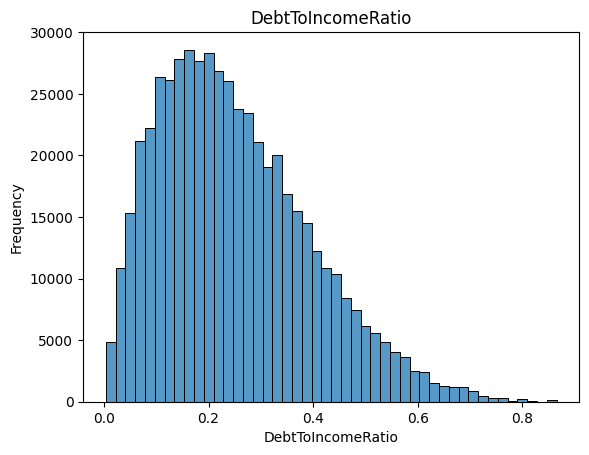

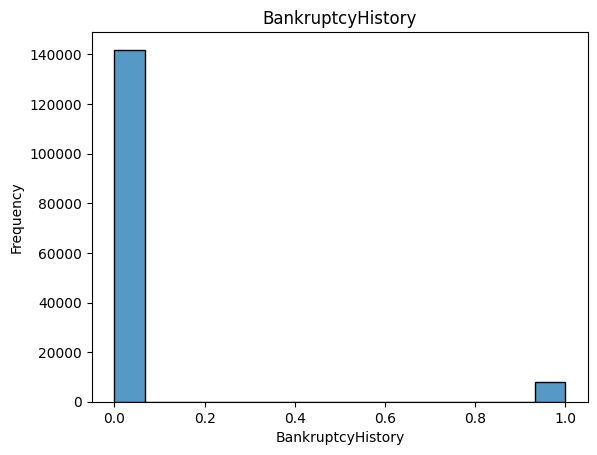

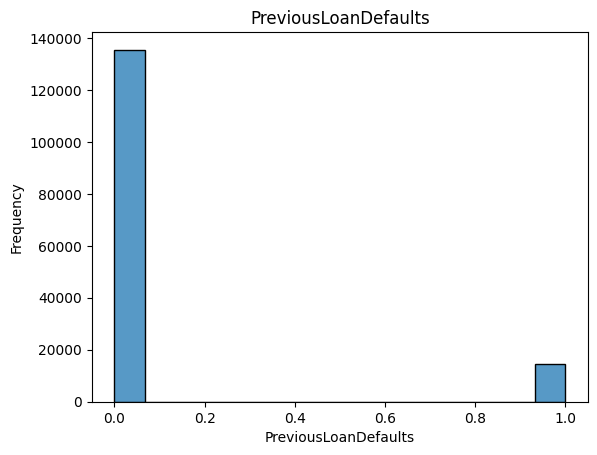

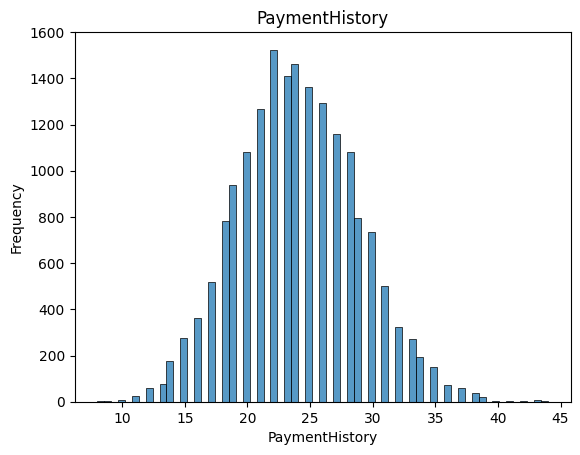

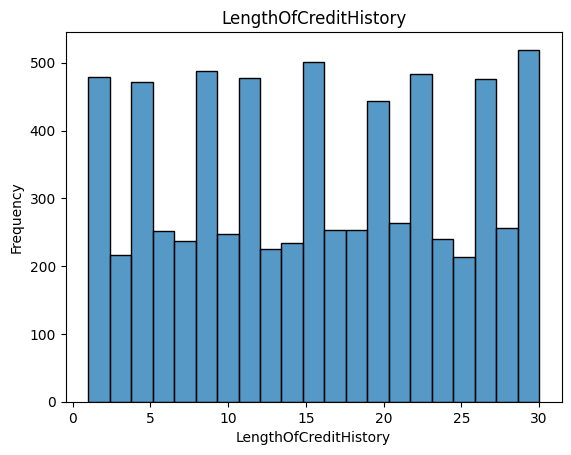

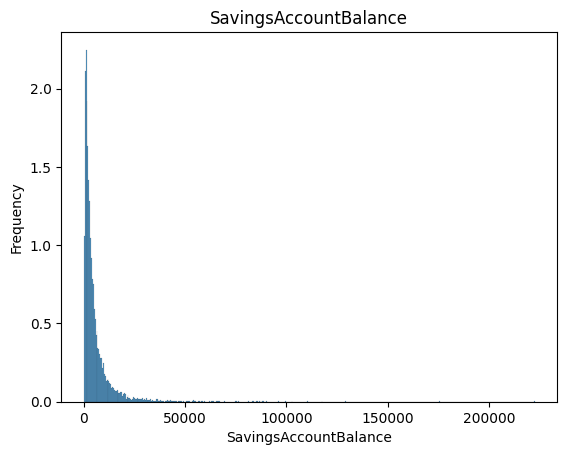

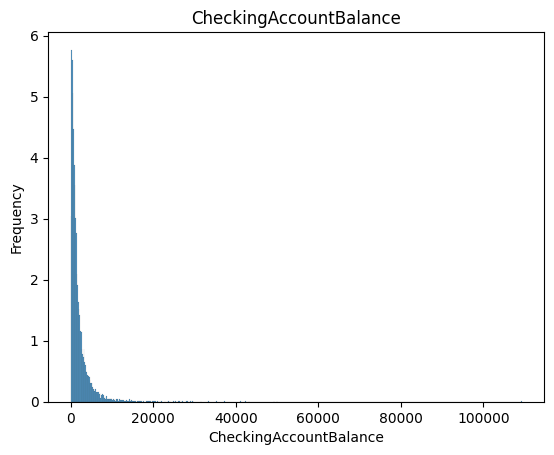

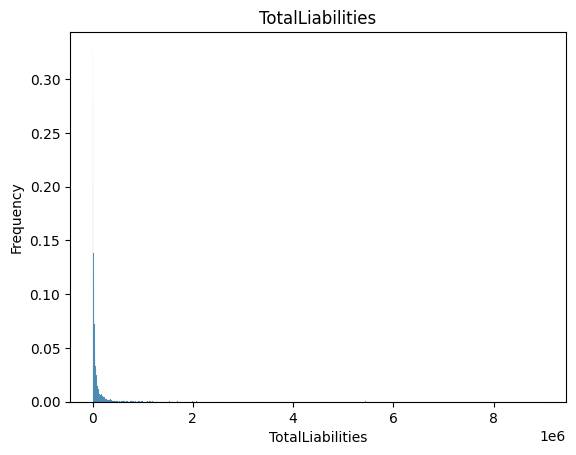

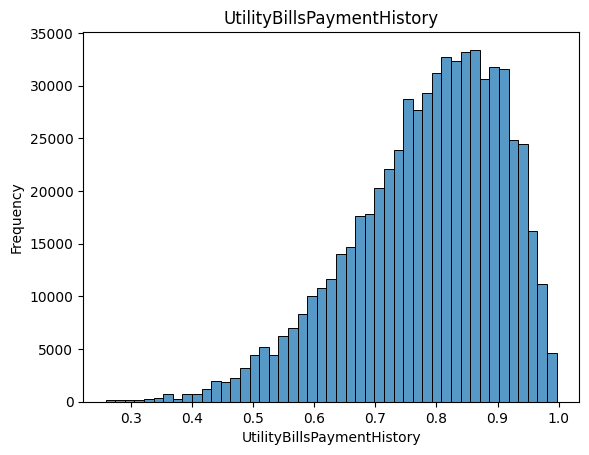

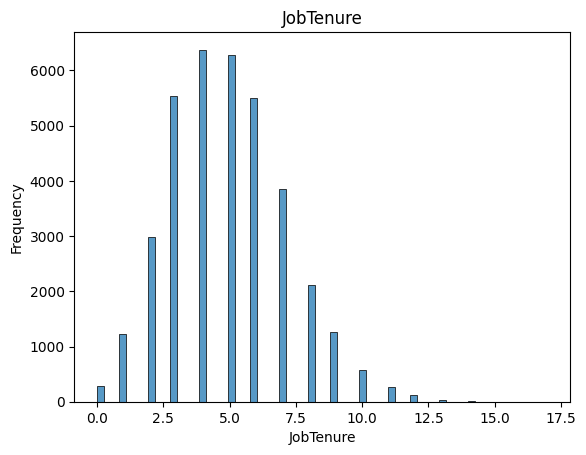

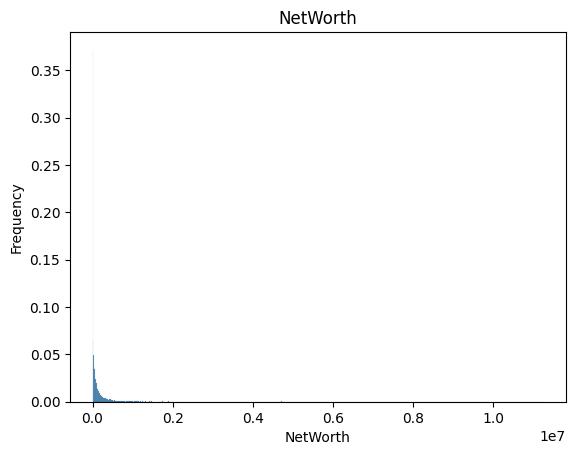

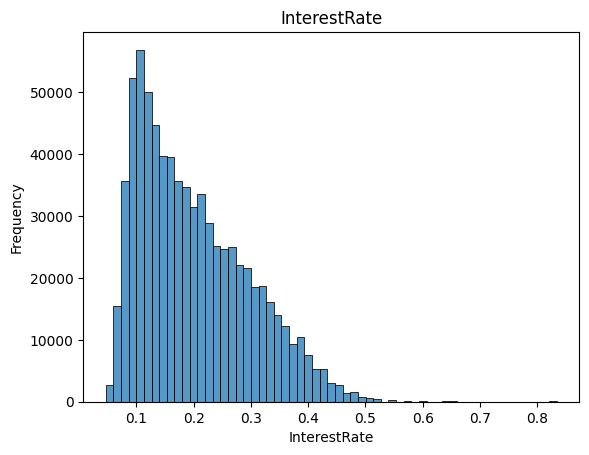

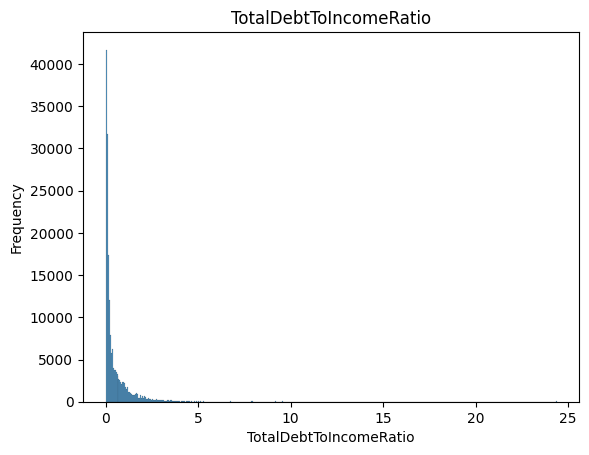

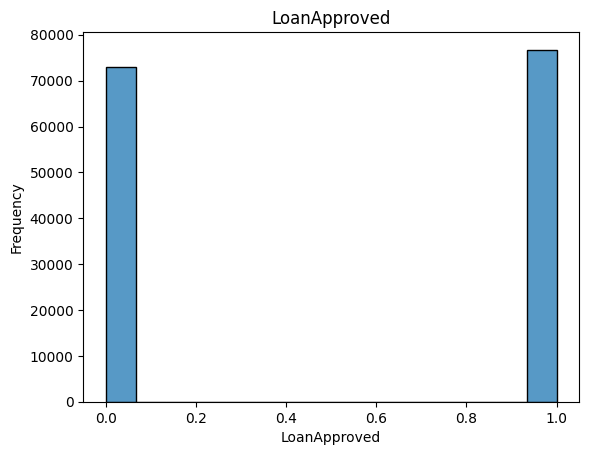

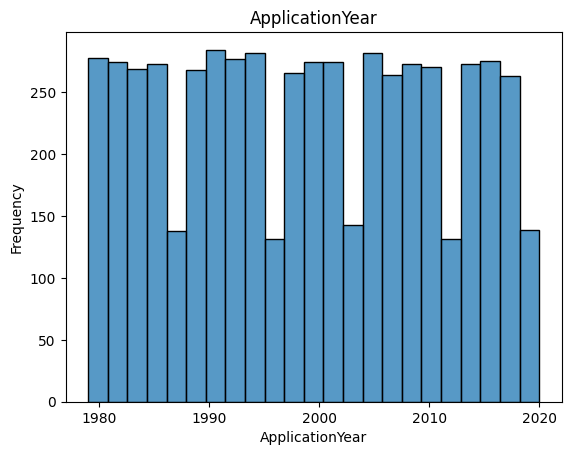

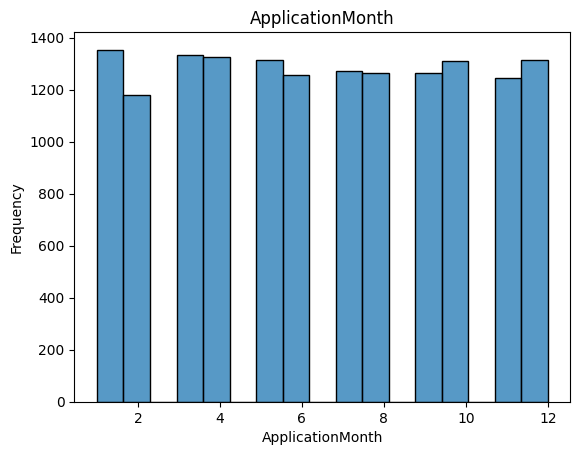

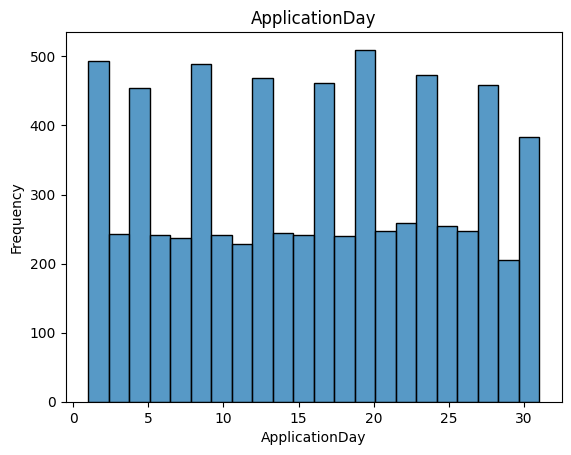

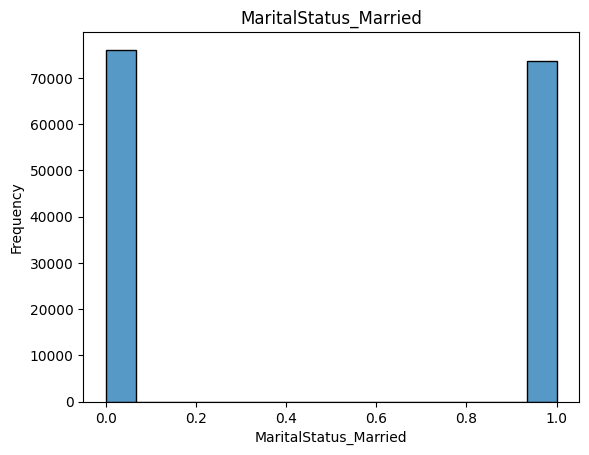

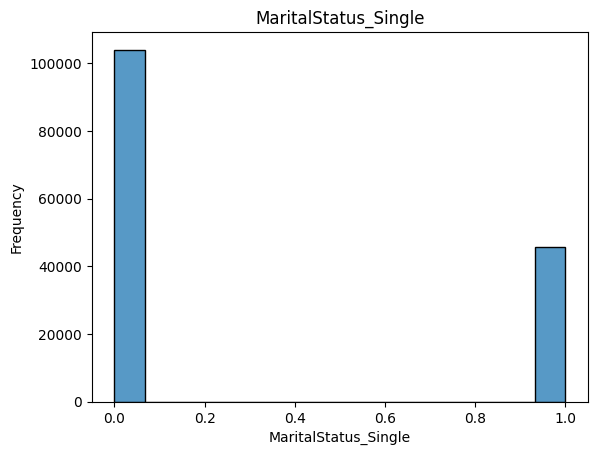

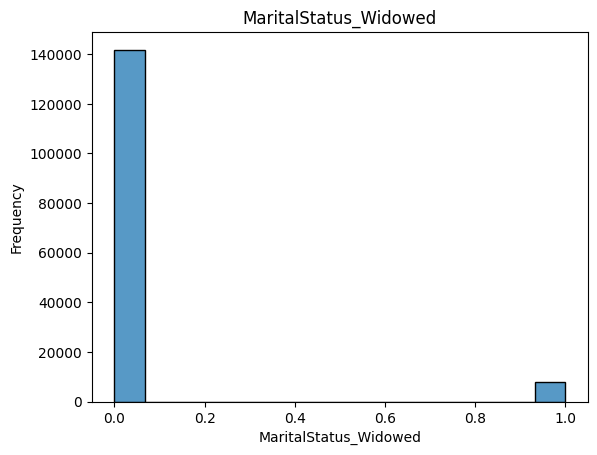

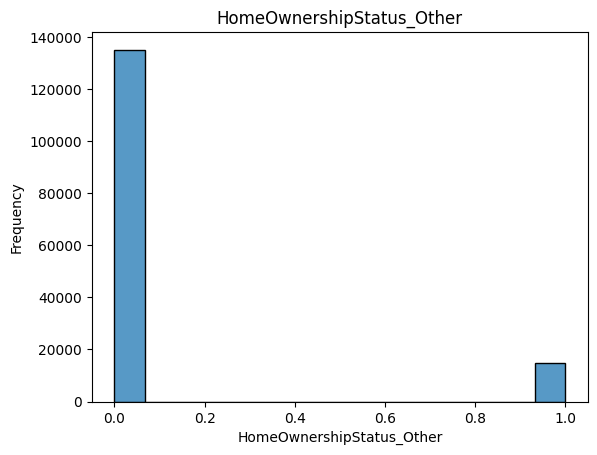

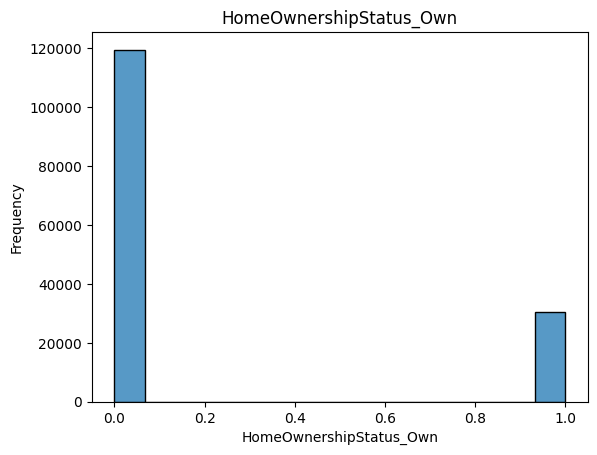

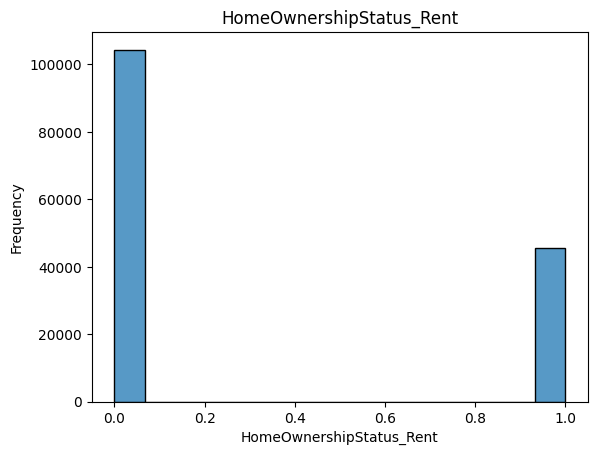

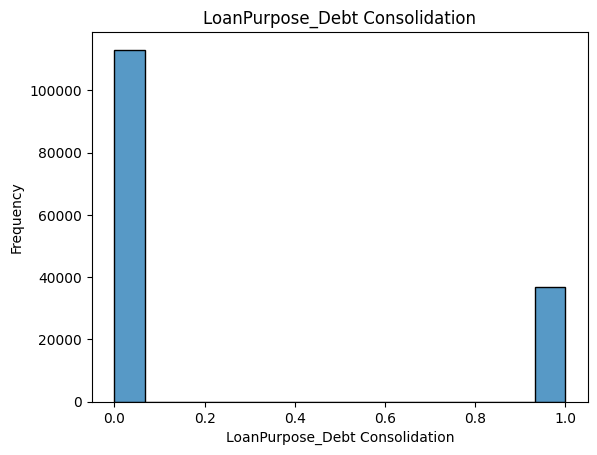

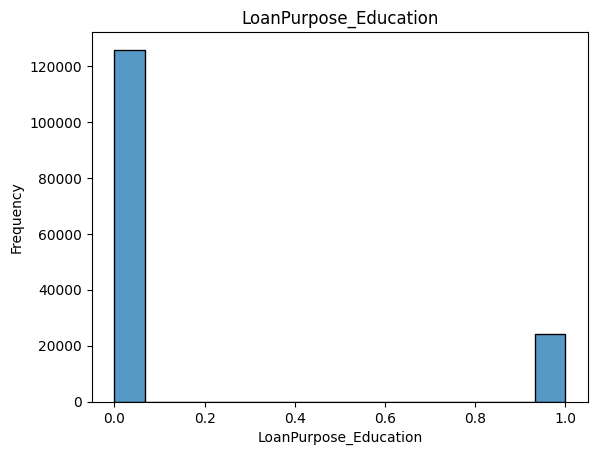

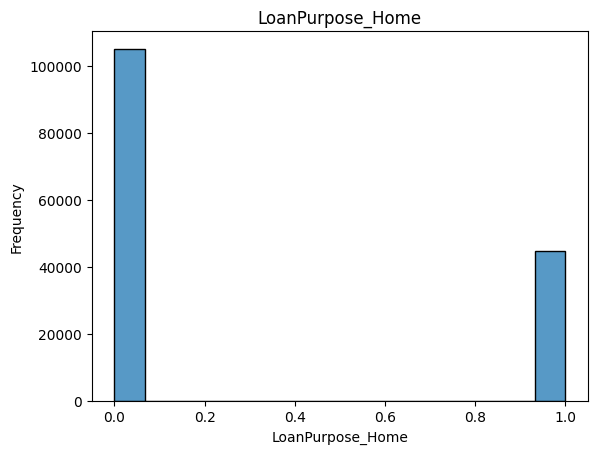

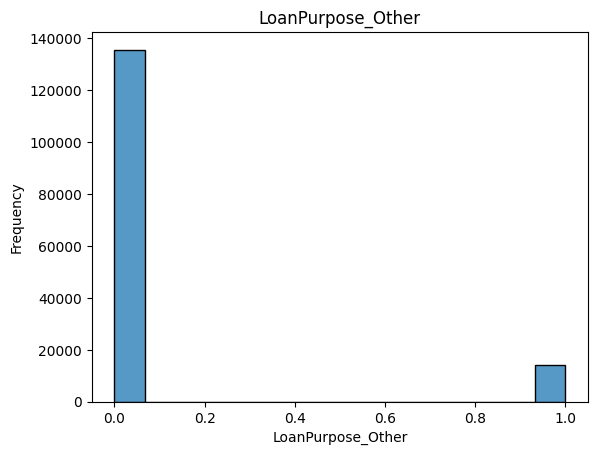

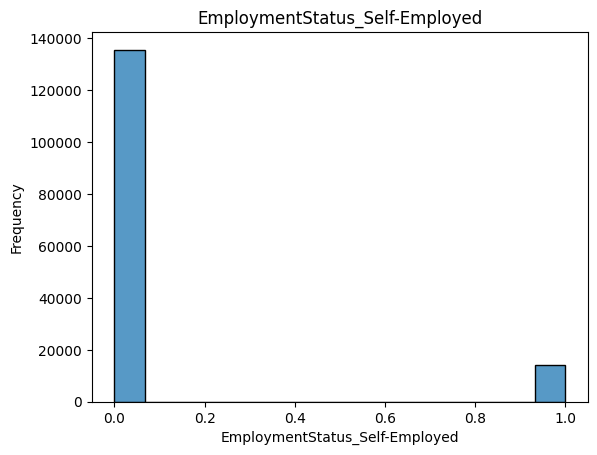

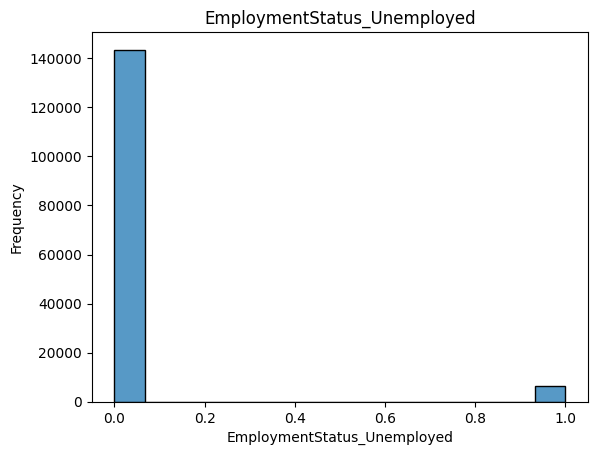

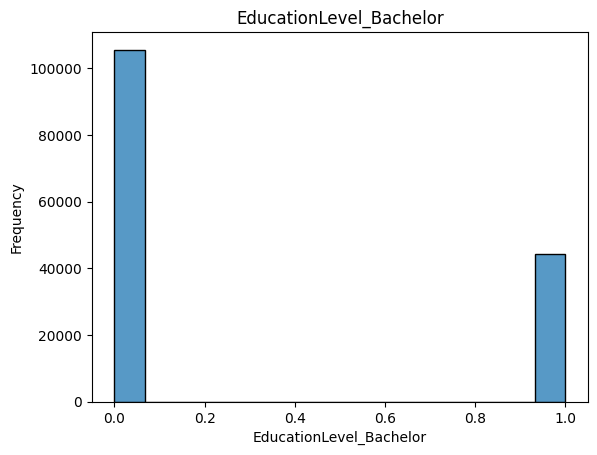

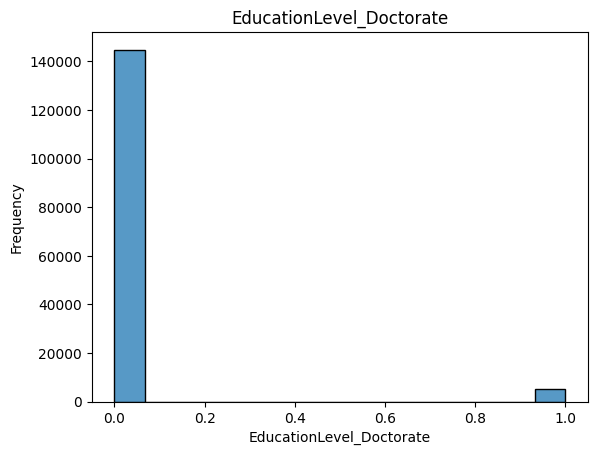

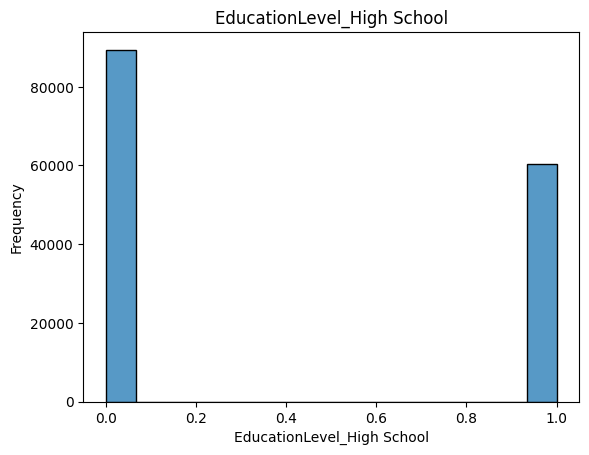

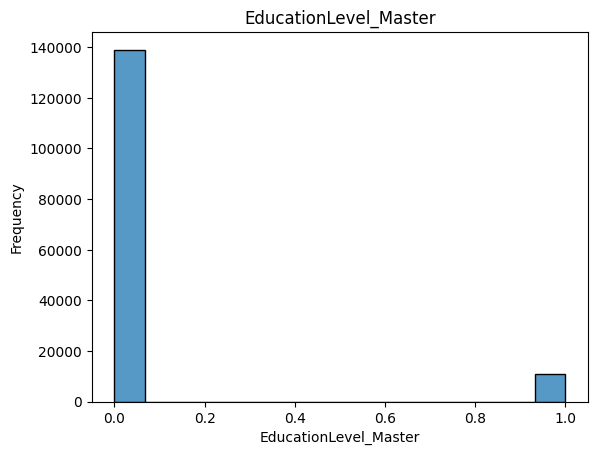

In [26]:
def show_histogram(df, column : str):
    sns.histplot(df[column], stat = 'frequency')
    plt.title(column)
    plt.show()
    
    
for name in df.columns:
    if isinstance(name, str) and name != 'RiskScore':
        show_histogram(df, name)

распределим колонки по типам распределения

In [27]:
uniform_colums = ['ApplicationYear', 'ApplicationMonth', 'ApplicationDay']
standart_colums = ['Age', 'CreditScore', 'LoanDuration', 'CreditCardUtilizationRate', 'NumberOfOpenCreditLines',
                'DebtToIncomeRatio', 'PaymentHistory', 'LengthOfCreditHistory', 'UtilityBillsPaymentHistory', 'JobTenure']
log_colums = ['LoanAmount', 'NumberOfDependents', 'MonthlyDebtPayments',
              'NumberOfCreditInquiries', 'SavingsAccountBalance', 'CheckingAccountBalance', 'TotalLiabilities',
              'NetWorth', 'InterestRate', 'TotalDebtToIncomeRatio']


теперь для колонок в uniform_colums применим min-max нормализацию, для колонок в standart_colums применим z-score нормализацию и для колонок в log_colums сначала логарифмируем их, потом применим z-score нормализацию

In [28]:
def normalize(df):
    df[standart_colums] = scaler_standard.fit_transform(df[standart_colums])
    df[uniform_colums] = scaler_min_max.fit_transform(df[uniform_colums])
    df[log_colums] = np.log1p(df[log_colums])
    df[log_colums] = scaler_standard.fit_transform(df[log_colums])
    
    return df

df = normalize(df)
df_test = normalize(df_test)

df = df[(df['RiskScore'] >= -100) & (df['RiskScore'] <= 100)]

отсечем слишком большие максимальные и минимальные значения в RiskScore

In [29]:
df = df[(df['RiskScore'] >= -100) & (df['RiskScore'] <= 100)]

6. Обучаем модели

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=['LoanApproved']).astype(float)
Y = df['LoanApproved'].astype(float)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train).astype(float)
X_test = scaler.transform(X_test).astype(float)


In [31]:
class LogisticRegression:
    def __init__(self):
        self.learning_rate = 0.01
        self.n_iters = 1000
        self.weights = []
        self.bias = 0


    def fit(self, x : pd.DataFrame, y : pd.Series):
        count_samples, count_features = x.shape
        self.weights = np.zeros(count_features)
        self.bias = 0

        for _ in range(self.n_iters):
            pred = 1 / (1 + np.exp(-(np.dot(x, self.weights) + self.bias)))

            dweights = (1 / count_samples) * np.dot(x.T, (pred - y))
            dbias = (1 / count_samples) * np.sum(pred - y)

            self.weights = self.weights - self.learning_rate * dweights
            self.bias = self.bias - self.learning_rate * dbias


    def predict(self, x : pd.DataFrame):
        pred =  1 / (1 + np.exp(-(np.dot(x, self.weights) + self.bias)))
        return np.where(pred > 0.5, 1, 0)
    

model = LogisticRegression()
X = df.drop(columns = ['LoanApproved']).astype(float)
Y = df['LoanApproved'].astype(float)

model.fit(X_train, Y_train)
pred = model.predict(X_test)



In [32]:


print(f'Recall: {recall_score(Y_test, pred) * 100}%')
print(f'F1_score: {f1_score(Y_test, pred) * 100}%')
print(f'Accurancy: {accuracy_score(Y_test, pred) * 100}%')
print(f'Precision: {precision_score(Y_test, pred) * 100}%')

Recall: 96.996996996997%
F1_score: 92.72727272727272%
Accurancy: 92.23697650663942%
Precision: 88.81759853345554%


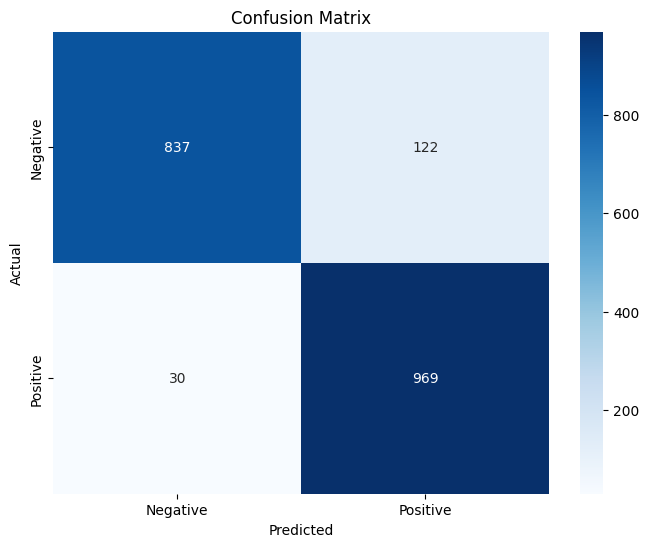

In [33]:
confusion = confusion_matrix(Y_test, pred)
plt.figure(figsize = (8, 6))
sns.heatmap(confusion,
            annot = True,
            fmt = 'd',
            cmap = 'Blues',
            xticklabels = ['Negative', 'Positive'],
            yticklabels = ['Negative', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()
     

Логистическая регрессия: sklearn

In [34]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, Y_train)

pred = model.predict(X_test)

print(f'Recall: {recall_score(Y_test, pred) * 100}%')
print(f'F1_score: {f1_score(Y_test, pred) * 100}%')
print(f'Accurancy: {accuracy_score(Y_test, pred) * 100}%')
print(f'Precision: {precision_score(Y_test, pred) * 100}%')

Recall: 99.4994994994995%
F1_score: 99.15211970074813%
Accurancy: 99.1317671092952%
Precision: 98.80715705765407%


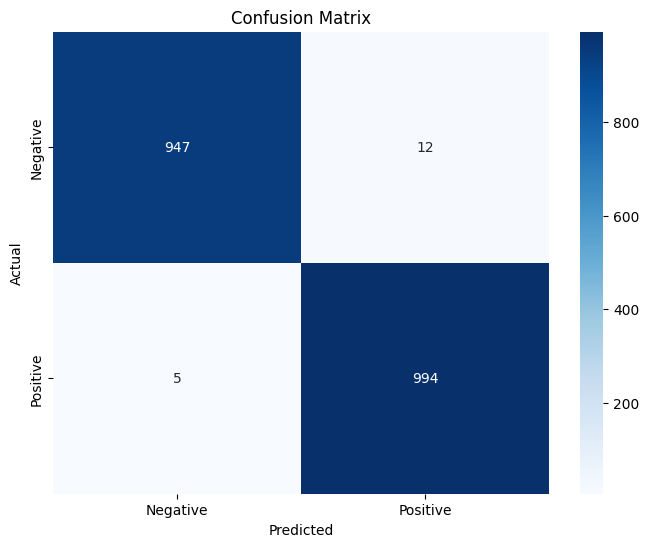

In [35]:
confusion = confusion_matrix(Y_test, pred)
plt.figure(figsize = (8, 6))
sns.heatmap(confusion,
            annot = True,
            fmt = 'd',
            cmap = 'Blues',
            xticklabels = ['Negative', 'Positive'],
            yticklabels = ['Negative', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

SVM: sklearn

In [36]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, Y_train)

pred = model.predict(X_test)

print(f'Recall: {recall_score(Y_test, pred) * 100}%')
print(f'F1_score: {f1_score(Y_test, pred) * 100}%')
print(f'Accurancy: {accuracy_score(Y_test, pred) * 100}%')
print(f'Precision: {precision_score(Y_test, pred) * 100}%')

Recall: 99.2992992992993%
F1_score: 98.95261845386534%
Accurancy: 98.92747701736467%
Precision: 98.60834990059642%


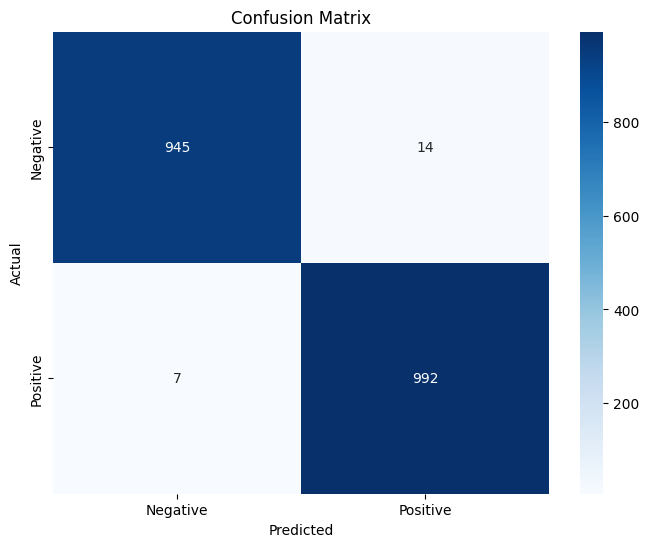

In [37]:
confusion = confusion_matrix(Y_test, pred)
plt.figure(figsize = (8, 6))
sns.heatmap(confusion,
            annot = True,
            fmt = 'd',
            cmap = 'Blues',
            xticklabels = ['Negative', 'Positive'],
            yticklabels = ['Negative', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

Решающее дерево: sklearn

In [38]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, Y_train)


pred = model.predict(X_test)

print(f'Recall: {recall_score(Y_test, pred) * 100}%')
print(f'F1_score: {f1_score(Y_test, pred) * 100}%')
print(f'Accurancy: {accuracy_score(Y_test, pred) * 100}%')
print(f'Precision: {precision_score(Y_test, pred) * 100}%')

Recall: 97.8978978978979%
F1_score: 97.99599198396794%
Accurancy: 97.95709908069459%
Precision: 98.09428284854563%


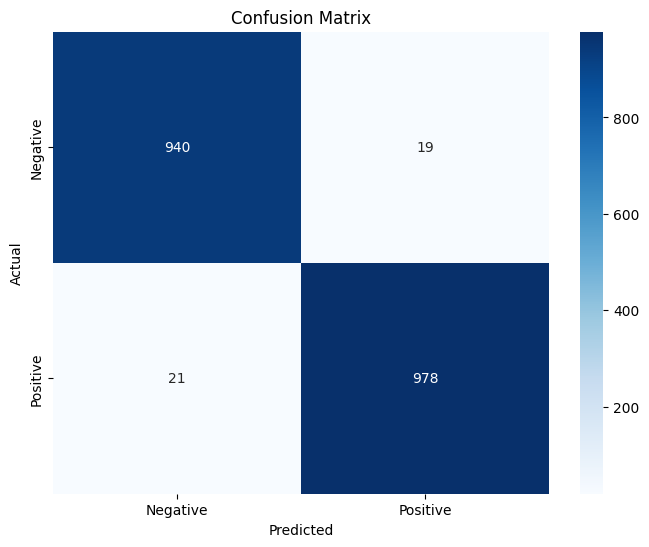

In [39]:
confusion = confusion_matrix(Y_test, pred)
plt.figure(figsize = (8, 6))
sns.heatmap(confusion,
            annot = True,
            fmt = 'd',
            cmap = 'Blues',
            xticklabels = ['Negative', 'Positive'],
            yticklabels = ['Negative', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

Случайный лес: sklearn

In [40]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, Y_train)

pred = model.predict(X_test)
print(f'Recall: {recall_score(Y_test, pred) * 100}%')
print(f'F1_score: {f1_score(Y_test, pred) * 100}%')
print(f'Accurancy: {accuracy_score(Y_test, pred) * 100}%')
print(f'Precision: {precision_score(Y_test, pred) * 100}%')


Recall: 98.998998998999%
F1_score: 98.35902536051717%
Accurancy: 98.31460674157303%
Precision: 97.72727272727273%


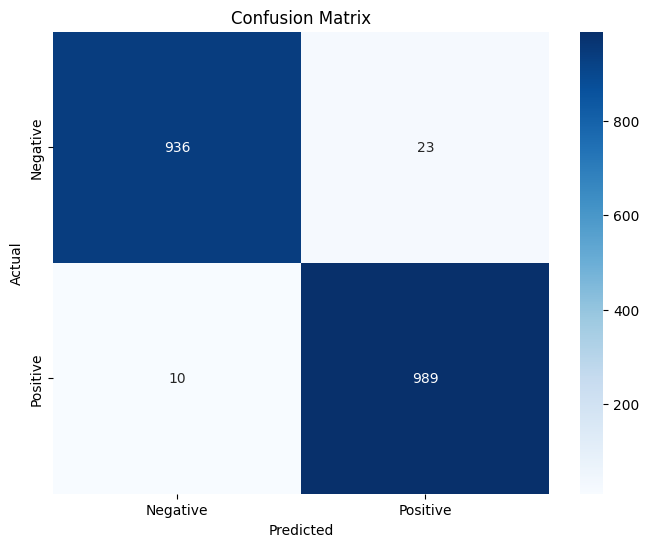

In [41]:
confusion = confusion_matrix(Y_test, pred)
plt.figure(figsize = (8, 6))
sns.heatmap(confusion,
            annot = True,
            fmt = 'd',
            cmap = 'Blues',
            xticklabels = ['Negative', 'Positive'],
            yticklabels = ['Negative', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

Градиентный бустинг: sklearn

In [42]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(X_train, Y_train)

pred = model.predict(X_test)
print(f'Recall: {recall_score(Y_test, pred) * 100}%')
print(f'F1_score: {f1_score(Y_test, pred) * 100}%')
print(f'Accurancy: {accuracy_score(Y_test, pred) * 100}%')
print(f'Precision: {precision_score(Y_test, pred) * 100}%')

Recall: 99.4994994994995%
F1_score: 99.20159680638723%
Accurancy: 99.18283963227783%
Precision: 98.90547263681592%


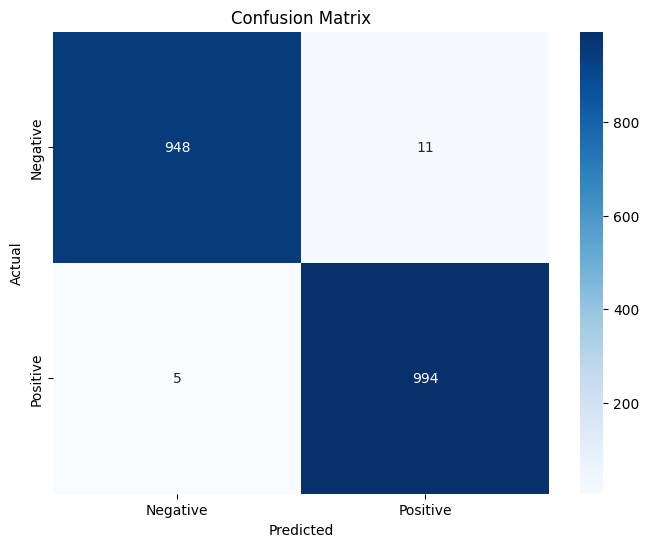

In [43]:
confusion = confusion_matrix(Y_test, pred)
plt.figure(figsize = (8, 6))
sns.heatmap(confusion,
            annot = True,
            fmt = 'd',
            cmap = 'Blues',
            xticklabels = ['Negative', 'Positive'],
            yticklabels = ['Negative', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

Градиентный бустинг: LightGBM


In [44]:
import lightgbm as lgb

model = lgb.LGBMClassifier()
model.fit(X_train, Y_train)

pred = model.predict(X_test)
print(f'Recall: {recall_score(Y_test, pred) * 100}%')
print(f'F1_score: {f1_score(Y_test, pred) * 100}%')
print(f'Accurancy: {accuracy_score(Y_test, pred) * 100}%')
print(f'Precision: {precision_score(Y_test, pred) * 100}%')

[LightGBM] [Info] Number of positive: 4013, number of negative: 3816
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000825 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3618
[LightGBM] [Info] Number of data points in the train set: 7829, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.512581 -> initscore=0.050336
[LightGBM] [Info] Start training from score 0.050336
Recall: 99.7997997997998%
F1_score: 99.50099800399201%
Accurancy: 99.48927477017364%
Precision: 99.20398009950249%


/home/bonik/Рабочий стол/ml/env/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/bonik/Рабочий стол/ml/env/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


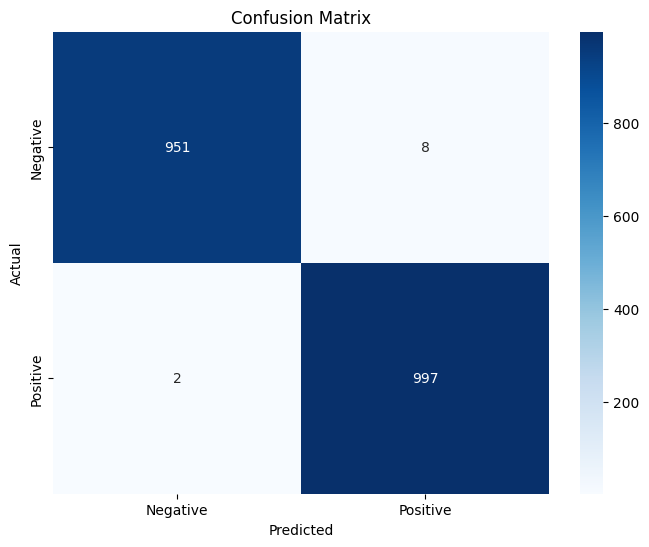

In [45]:
confusion = confusion_matrix(Y_test, pred)
plt.figure(figsize = (8, 6))
sns.heatmap(confusion,
            annot = True,
            fmt = 'd',
            cmap = 'Blues',
            xticklabels = ['Negative', 'Positive'],
            yticklabels = ['Negative', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

Градиентный бустинг: XGBoost

In [46]:
from xgboost import XGBClassifier


model = XGBClassifier()
model.fit(X_train, Y_train)

pred = model.predict(X_test)
print(f'Recall: {recall_score(Y_test, pred) * 100}%')
print(f'F1_score: {f1_score(Y_test, pred) * 100}%')
print(f'Accurancy: {accuracy_score(Y_test, pred) * 100}%')
print(f'Precision: {precision_score(Y_test, pred) * 100}%')

Recall: 99.5995995995996%
F1_score: 99.30139720558883%
Accurancy: 99.2849846782431%
Precision: 99.00497512437812%


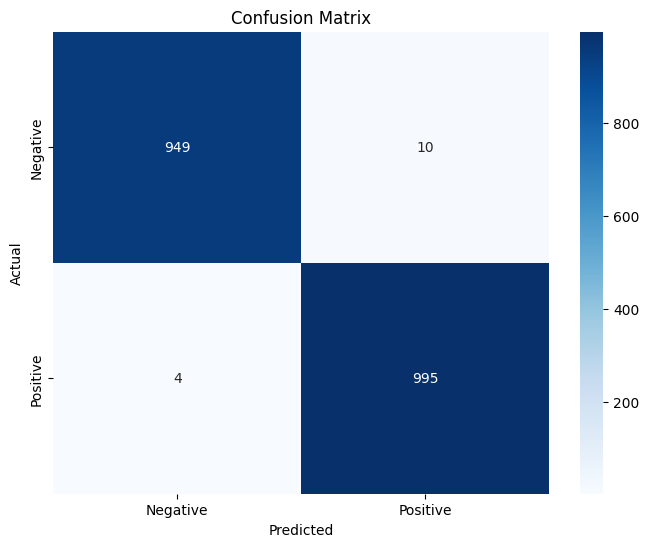

In [47]:
confusion = confusion_matrix(Y_test, pred)
plt.figure(figsize = (8, 6))
sns.heatmap(confusion,
            annot = True,
            fmt = 'd',
            cmap = 'Blues',
            xticklabels = ['Negative', 'Positive'],
            yticklabels = ['Negative', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

Градиентный бустинг: catboost

In [48]:
from catboost import CatBoostClassifier

model = CatBoostClassifier()
model.fit(X_train, Y_train)

pred = model.predict(X_test)
print(f'Recall: {recall_score(Y_test, pred) * 100}%')
print(f'F1_score: {f1_score(Y_test, pred) * 100}%')
print(f'Accurancy: {accuracy_score(Y_test, pred) * 100}%')
print(f'Precision: {precision_score(Y_test, pred) * 100}%')

Learning rate set to 0.024805
0:	learn: 0.6467308	total: 2.74ms	remaining: 2.73s
1:	learn: 0.5964295	total: 4.57ms	remaining: 2.28s
2:	learn: 0.5617631	total: 6.13ms	remaining: 2.04s
3:	learn: 0.5267231	total: 7.65ms	remaining: 1.91s
4:	learn: 0.4870034	total: 9.21ms	remaining: 1.83s
5:	learn: 0.4576128	total: 10.8ms	remaining: 1.78s
6:	learn: 0.4314421	total: 12.4ms	remaining: 1.75s
7:	learn: 0.4047775	total: 14ms	remaining: 1.73s
8:	learn: 0.3811706	total: 15.8ms	remaining: 1.74s
9:	learn: 0.3569960	total: 17.6ms	remaining: 1.74s
10:	learn: 0.3368081	total: 19.3ms	remaining: 1.73s
11:	learn: 0.3181007	total: 21ms	remaining: 1.73s
12:	learn: 0.2953682	total: 22.6ms	remaining: 1.72s
13:	learn: 0.2766887	total: 24.2ms	remaining: 1.7s
14:	learn: 0.2561345	total: 25.6ms	remaining: 1.68s
15:	learn: 0.2365914	total: 27.1ms	remaining: 1.67s
16:	learn: 0.2256748	total: 28.5ms	remaining: 1.65s
17:	learn: 0.2102964	total: 30.1ms	remaining: 1.64s
18:	learn: 0.1983677	total: 31.7ms	remaining: 1.6

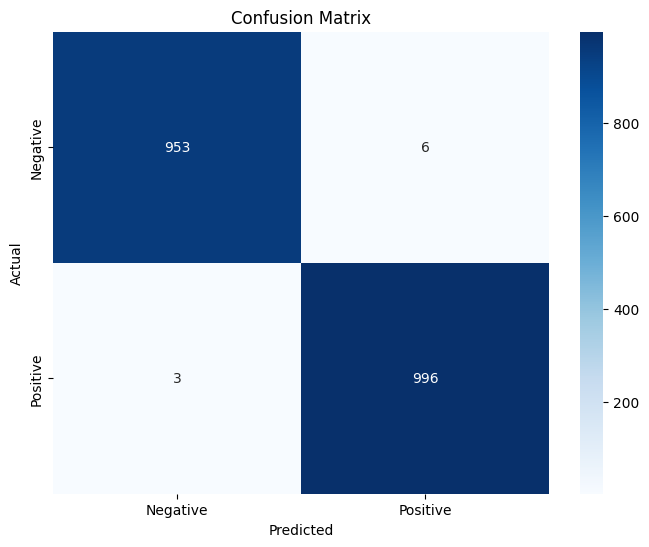

In [49]:
confusion = confusion_matrix(Y_test, pred)
plt.figure(figsize = (8, 6))
sns.heatmap(confusion,
            annot = True,
            fmt = 'd',
            cmap = 'Blues',
            xticklabels = ['Negative', 'Positive'],
            yticklabels = ['Negative', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

Выводы

В результате эксперимента с различными моделями машинного обучения для задачи бинарной классификации большинство алгоритмов продемонстрировали высокие значения метрик, что свидетельствует о хорошем качестве классификации. F1-Score оказалась наиболее информативной метрикой, так как она отражает баланс между точностью (Precision) и полнотой (Recall). Однако более наглядной является матрица ошибок.
Все виды градиентного бустинга показали практически одинкаотвые высокие результаты от 99.2% у sklearn до 99.55% у catboost.Логистическая регрессия и SVM и также продемонстрировали отличные показатели, подтверждая свою эффективность для задач с хорошо разделимыми классами.. Модель K-Nearest Neighbors, напротив, отстала с F1-Score в 87.64%, вероятно, из-за чувствительности к структуре данных и выбору гиперпараметров.
Мой класс линейного классификатора показал достойные результаты с F1-Score 94.14%, что подтверждает корректность его реализации. Но все равно, его показатели уступают лучшим моделям, что может быть связано с ограниченной сложностью модели и отсутствием регуляризации.
